In [60]:
%matplotlib inline

import itertools
import numpy as np
import matplotlib.pyplot as plt

def main():
    np.random.seed(1977)
    numvars, numdata = 4, 10
    data = 10 * np.random.random((numvars, numdata))
    fig = scatterplot_matrix(data, ['mpg', 'disp', 'drat', 'wt'],
            linestyle='none', marker='o', color='black', mfc='none')
    fig.suptitle('Simple Scatterplot Matrix')
    plt.show()

def eeg_scatter(eeg_data, elec_range, name):
    fig = scatterplot_matrix(eeg_data, elec_range, 8000,
            linestyle='none', marker='o', color='red', mfc='none')
    fig.suptitle(name + ' ' + str(elec_range))
    plt.show()

    
def scatterplot_matrix(data, names, numdata, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars = len(names)
    print data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[:numdata, x], data[:numdata, y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

In [44]:
import h5py
import os
os.chdir("C:/Users/Nitin/Documents/Hopkins/BCI/datashare/nicolas")

# return tuple of patient info
def get_patient_simp(filename):
    elec_range = range(0, 110)
    # get data
    D = h5py.File(filename + ".mat", 'r')
    patient = D["EEG"]["data"][:, :]
    return patient


In [45]:
patient_names = [
    "gp_A00051826001",
    "bip_A00053375001",
    "gip_A00051826005",
    "gip_A00051955001",
    "gip_A00053440001"
]
patients =[]
for name in patient_names:
    patients.append(get_patient_simp(name))
    
patient = get_patient_simp("bip_A00053375001")

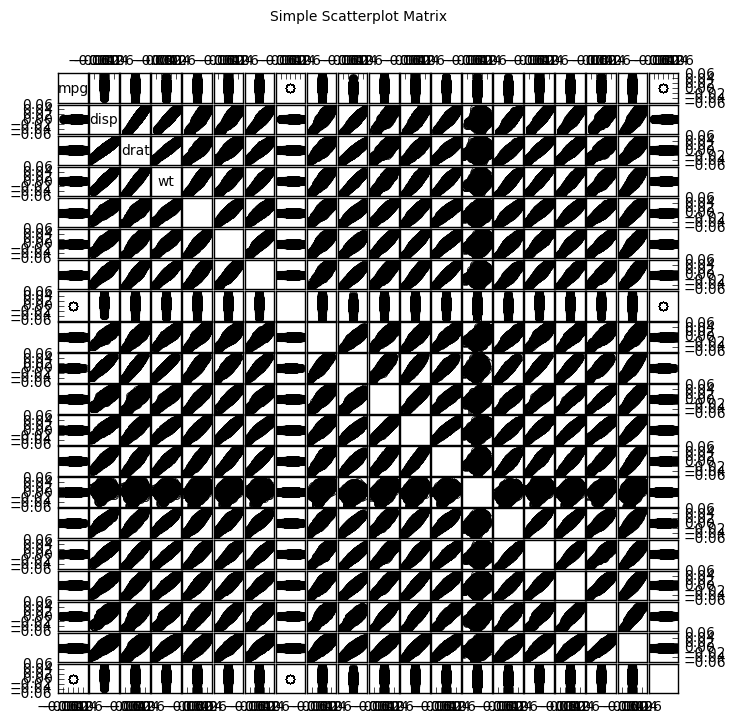

Wall time: 3min


In [47]:
%%time

eeg_scatter(patient)

(131348L, 111L)


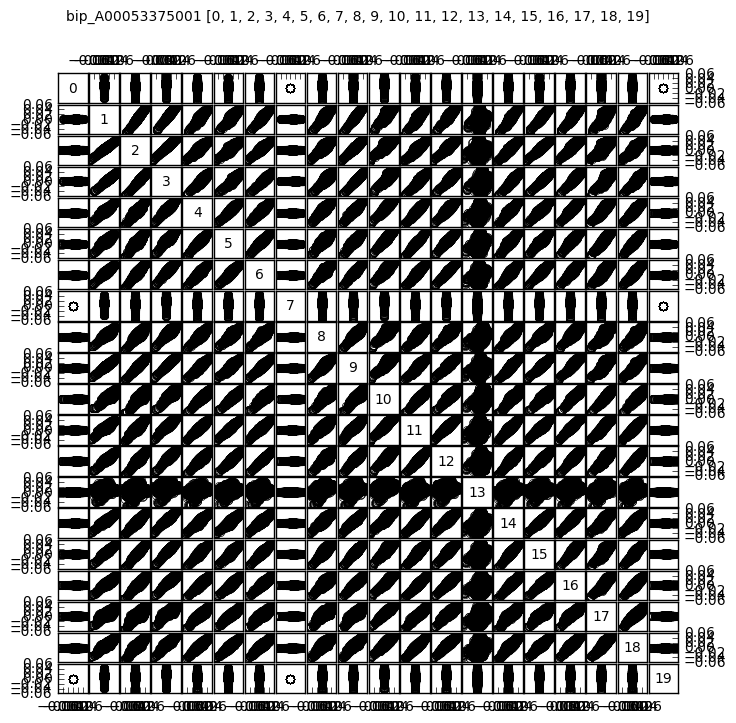

(131348L, 111L)


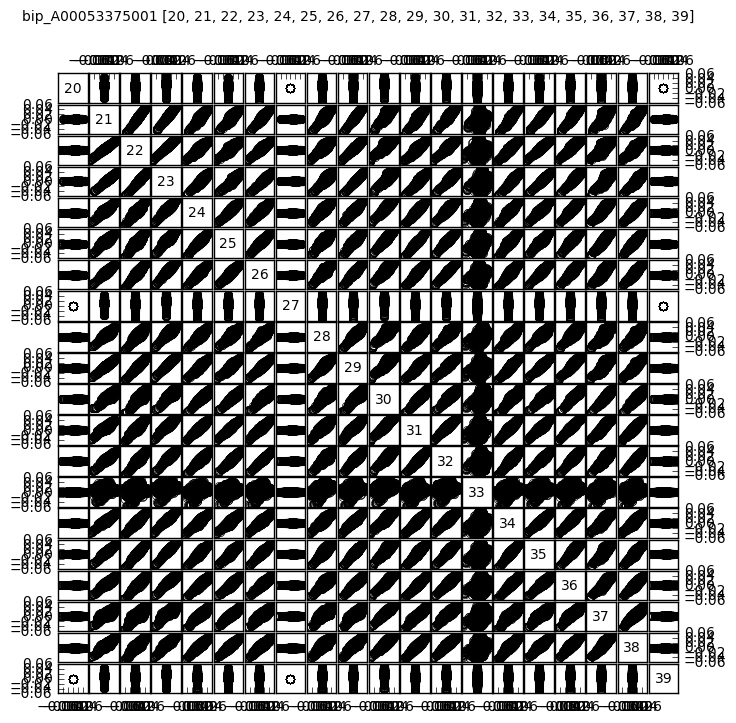

(131348L, 111L)


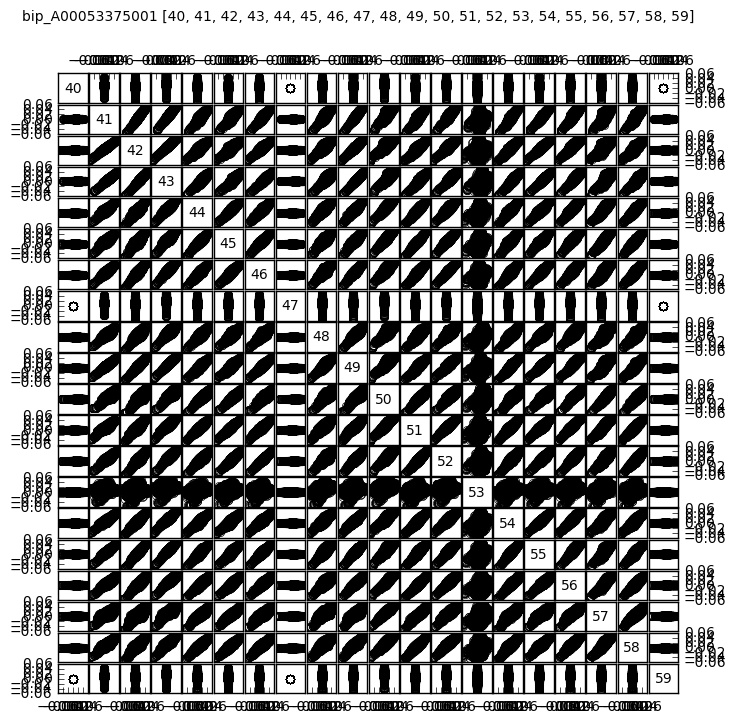

(131348L, 111L)


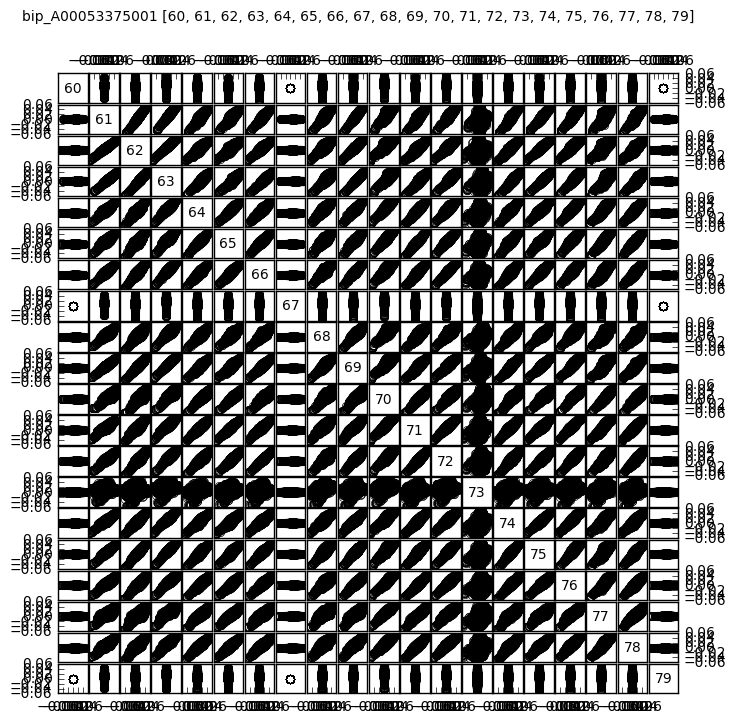

(131348L, 111L)


KeyboardInterrupt: 

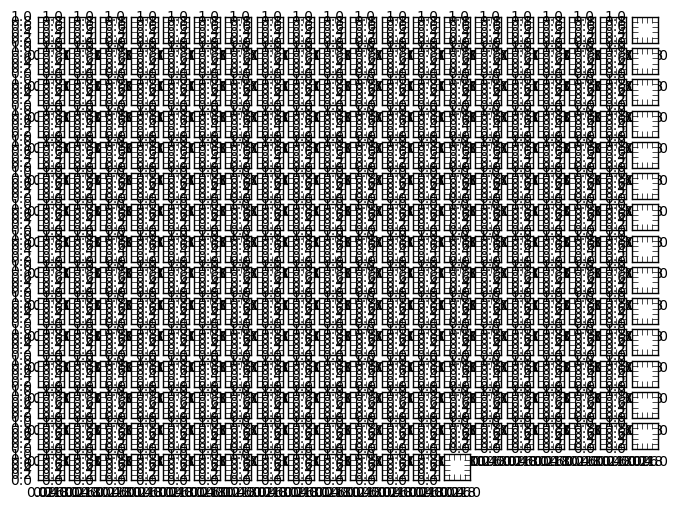

In [66]:
to_run =[
    range(0, 20),
    range(20, 40),
    range(40, 60),
    range(60, 80),
    range(80, 100),
    range(100, 111)
]

for elec_range in to_run:
    eeg_scatter(patients[1], elec_range, patient_names[1])

(103526L, 111L)


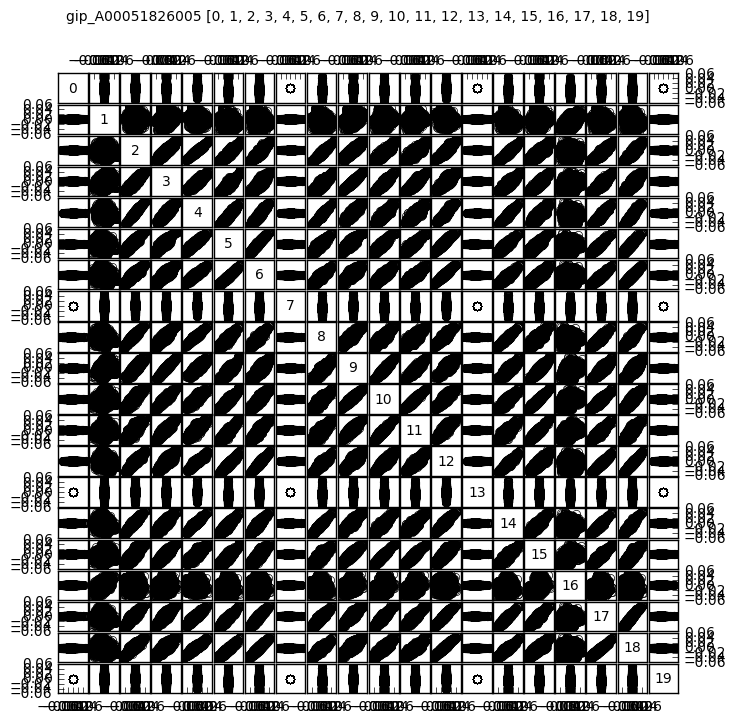

(103526L, 111L)


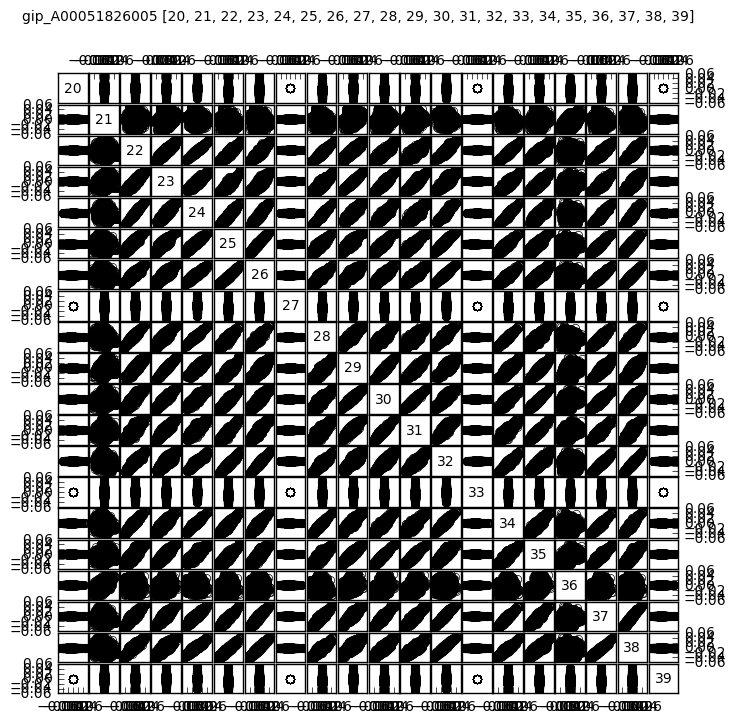

(103526L, 111L)


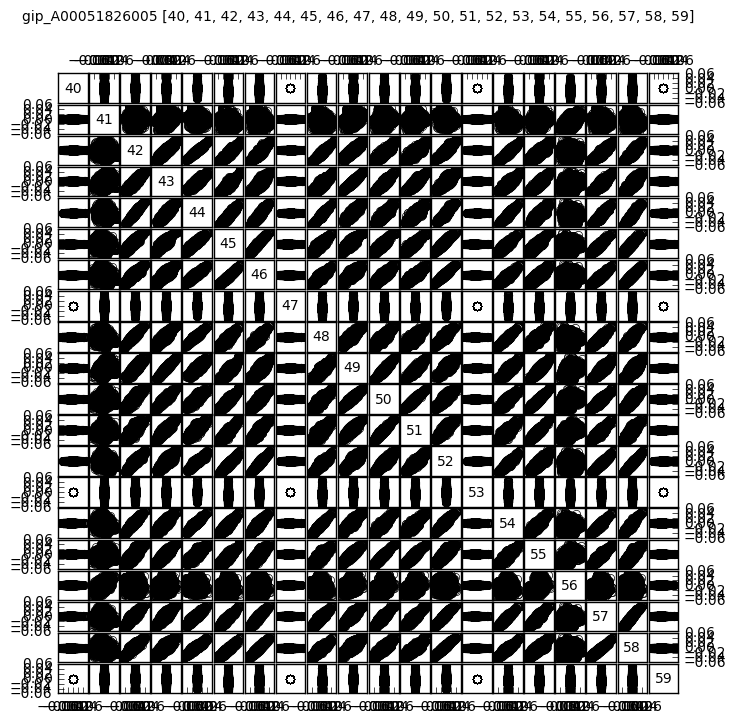

(103526L, 111L)


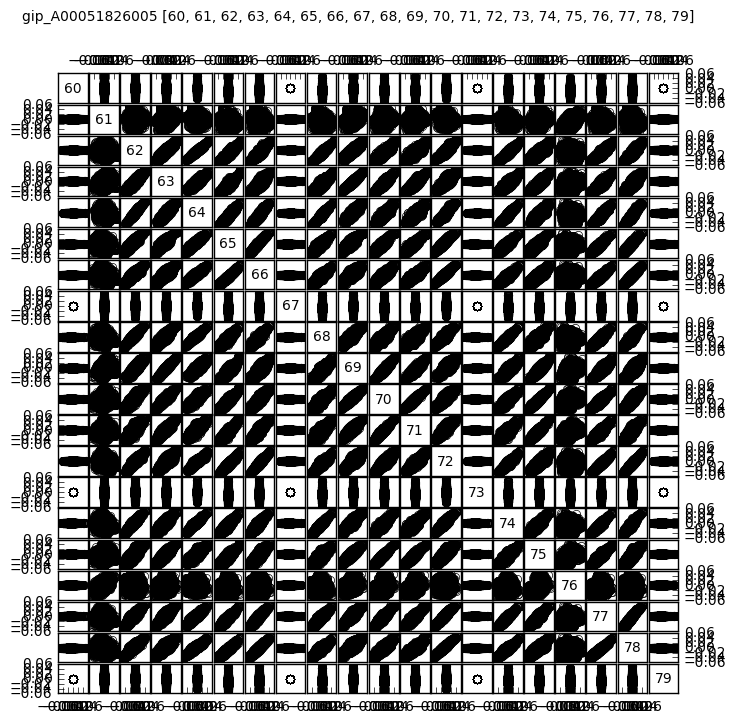

(103526L, 111L)


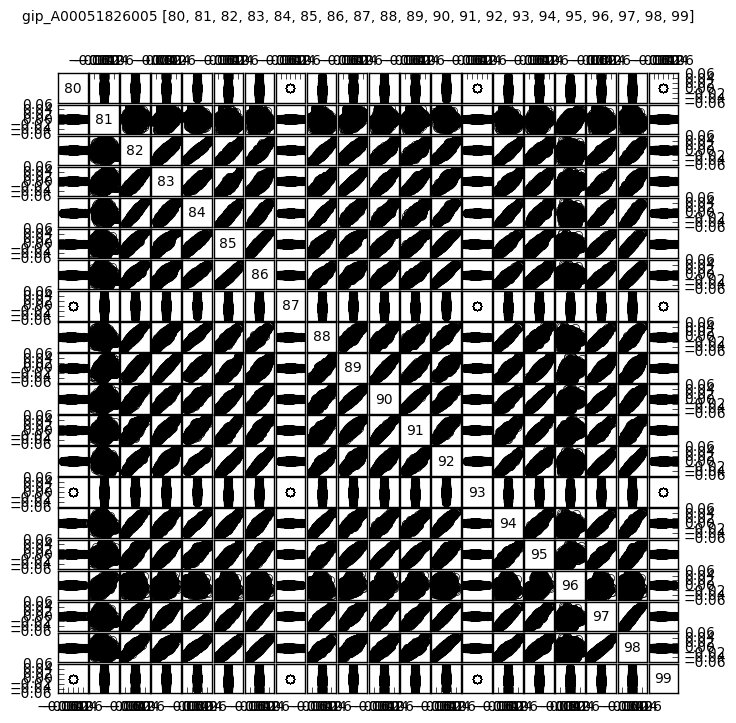

(103526L, 111L)


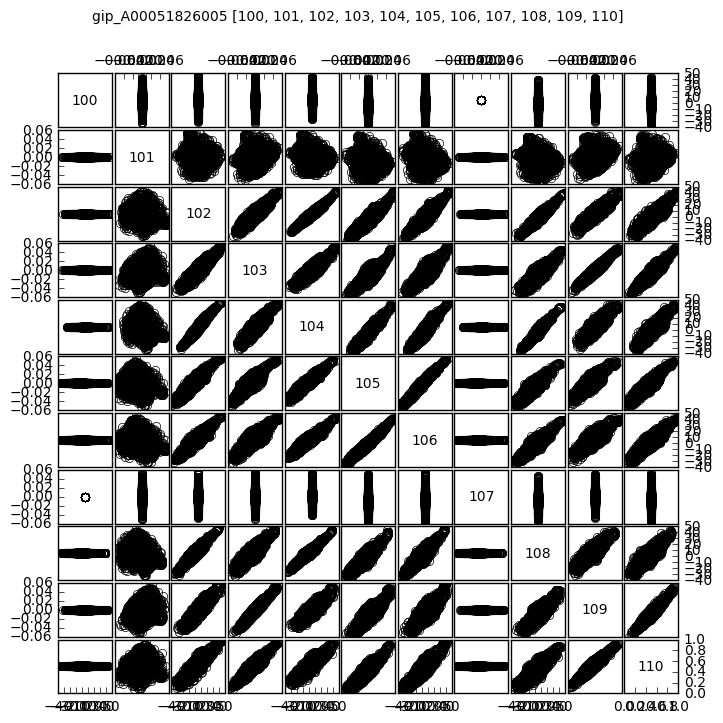

In [67]:
for elec_range in to_run:
    eeg_scatter(patients[2], elec_range, patient_names[2])

(181500L, 111L)


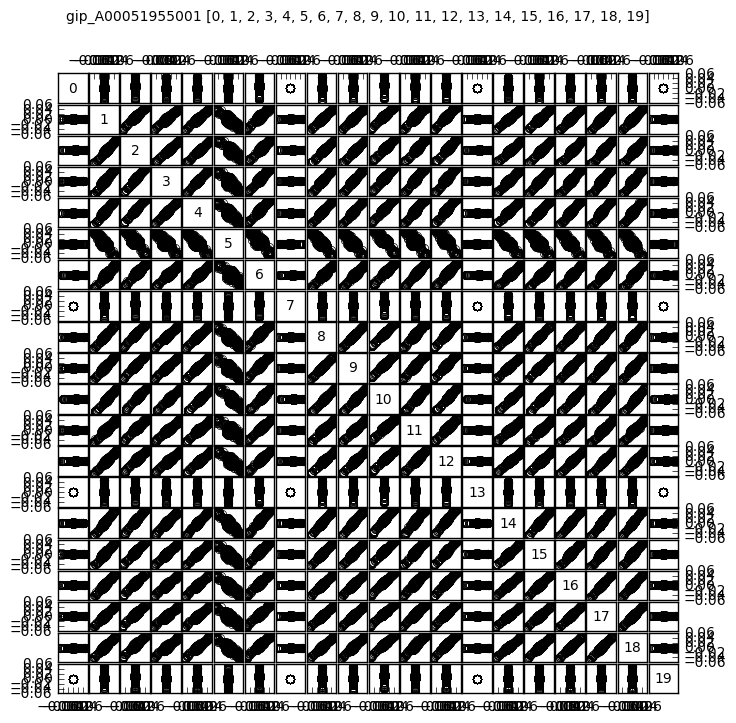

(181500L, 111L)


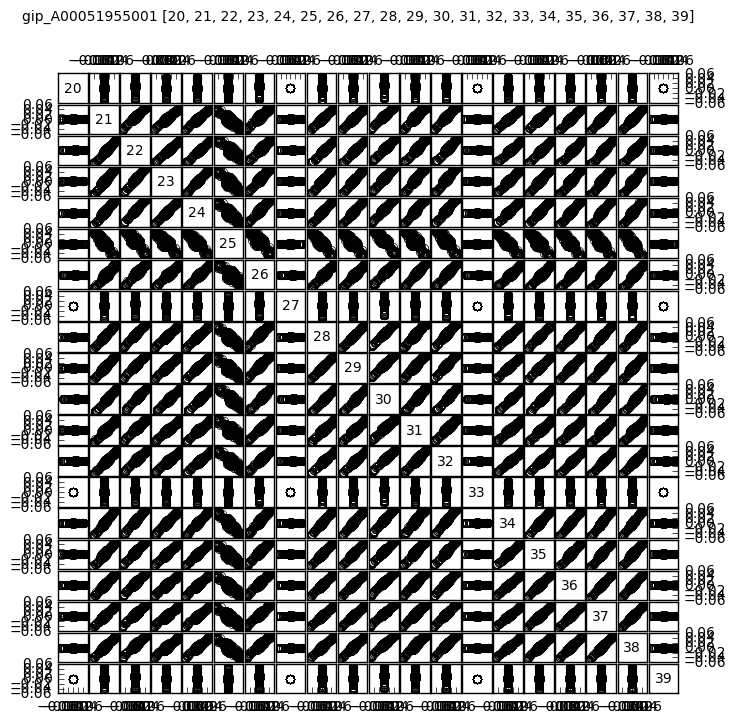

(181500L, 111L)


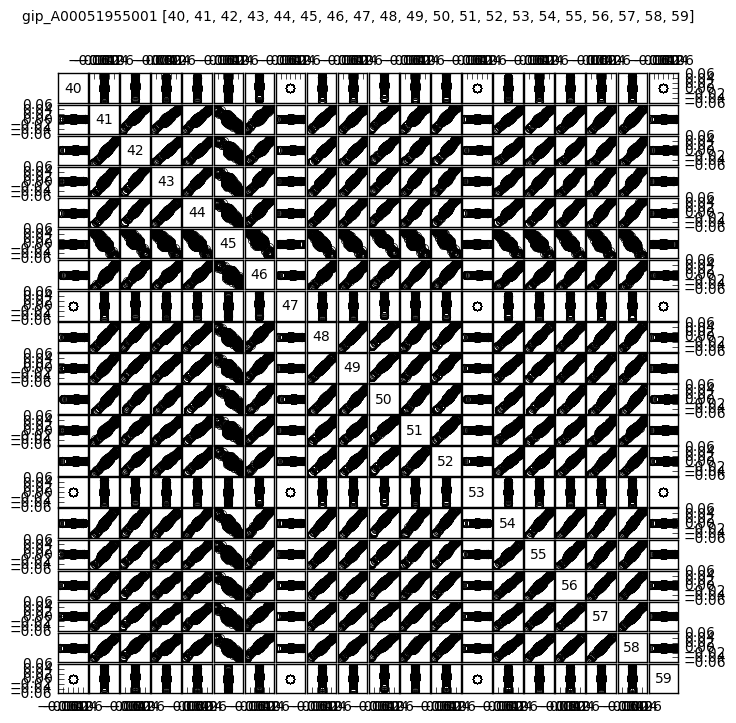

(181500L, 111L)


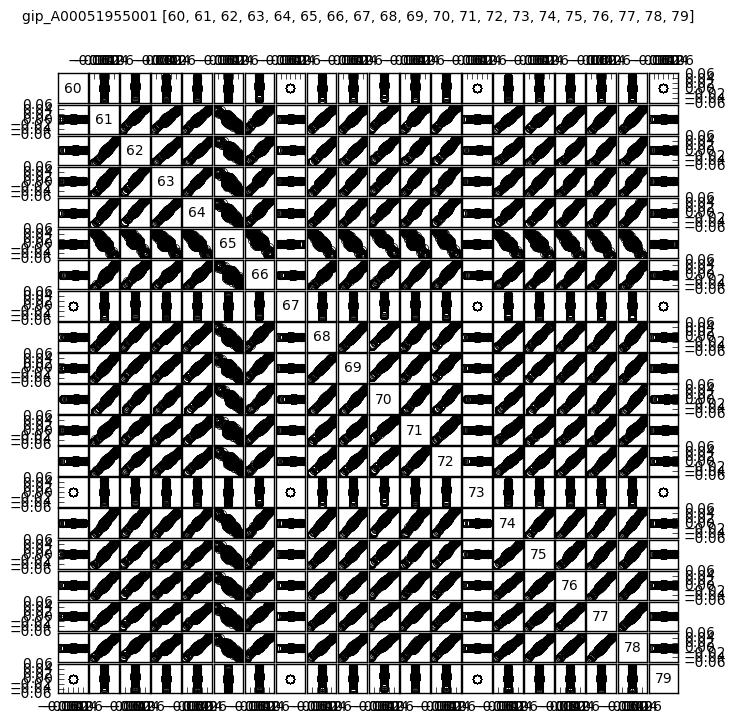

(181500L, 111L)


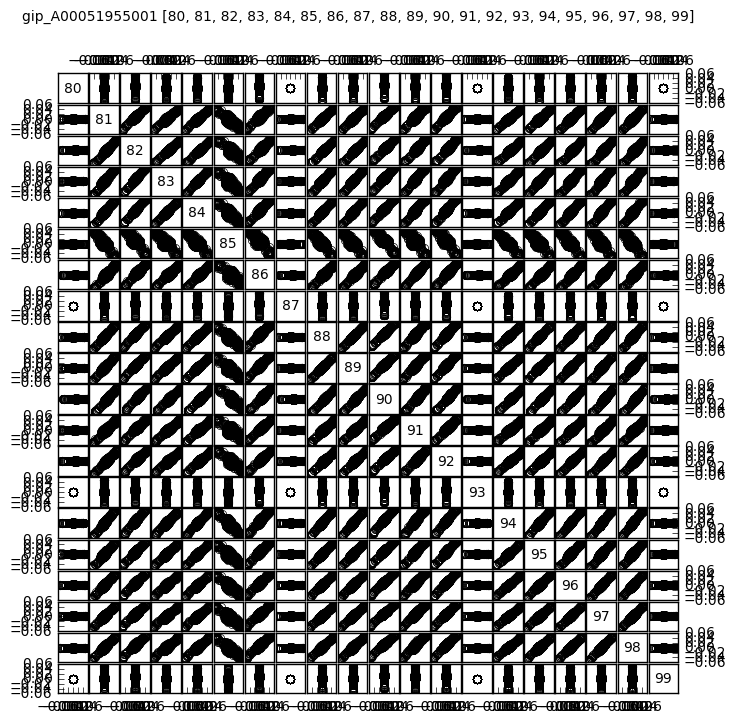

(181500L, 111L)


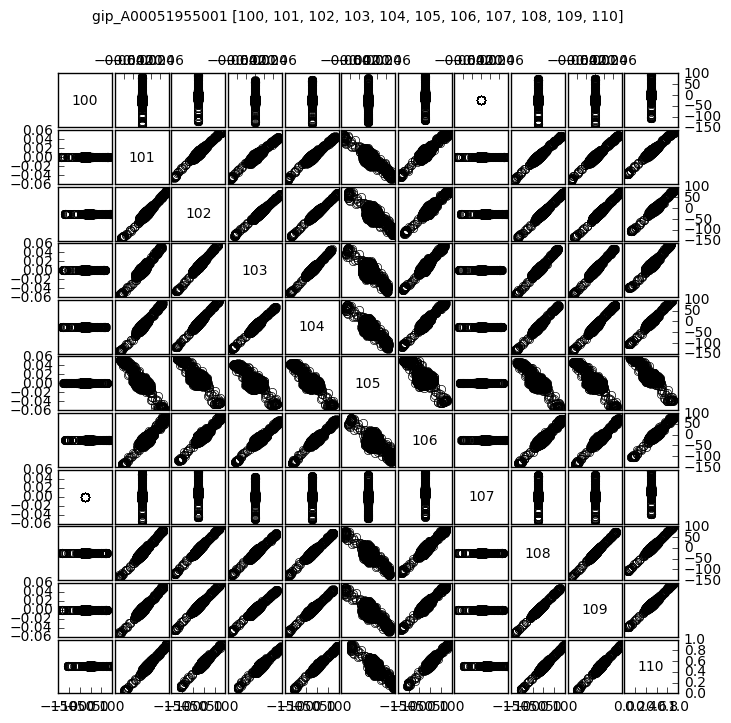

In [68]:
for elec_range in to_run:
    eeg_scatter(patients[3], elec_range, patient_names[3])

(180719L, 111L)


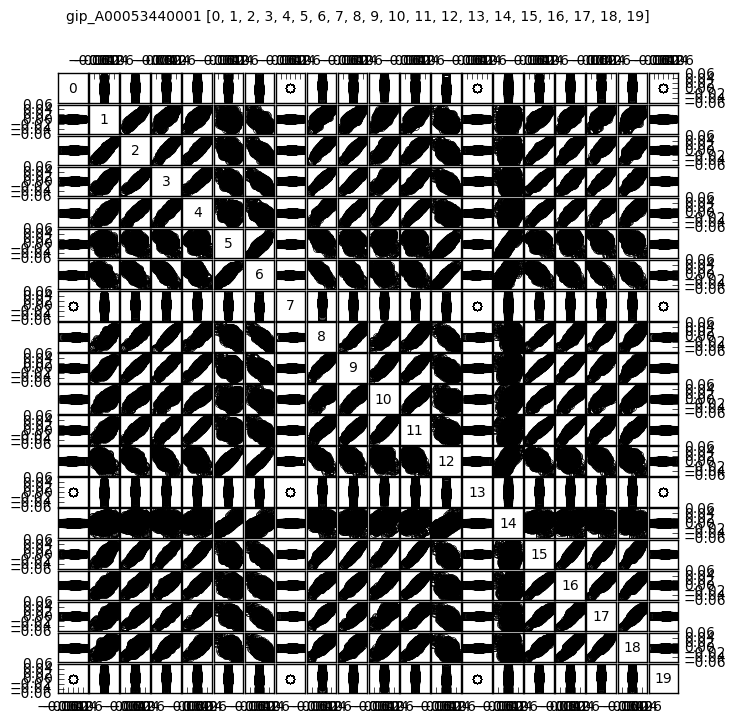

(180719L, 111L)


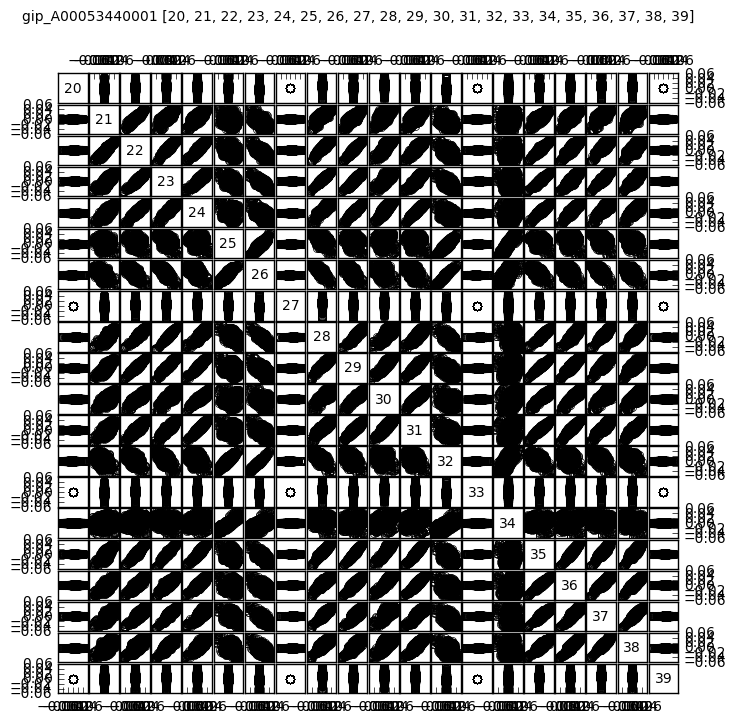

(180719L, 111L)


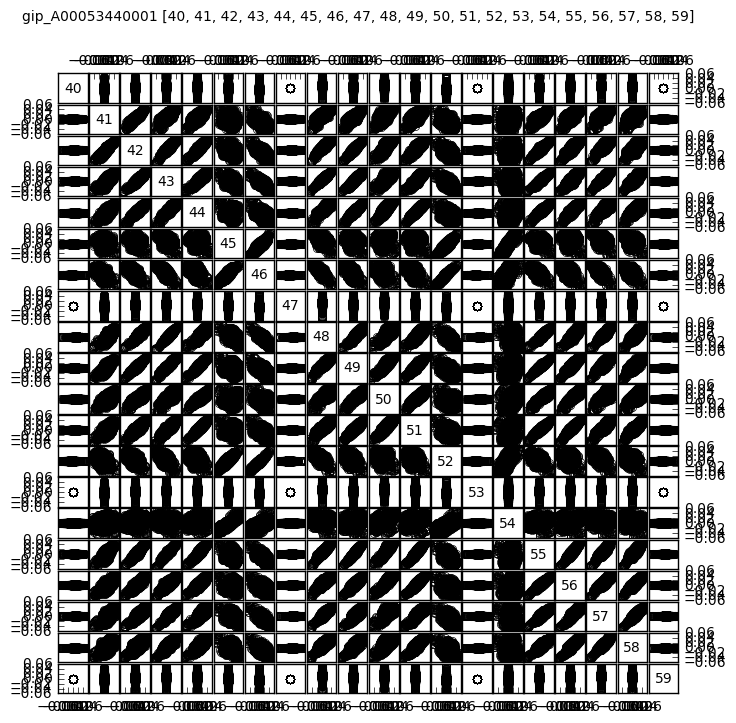

(180719L, 111L)


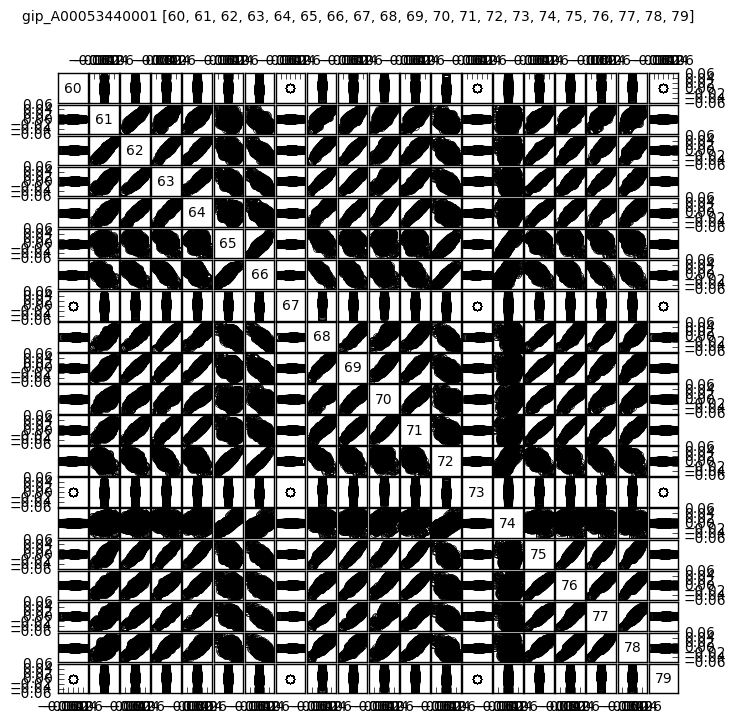

(180719L, 111L)


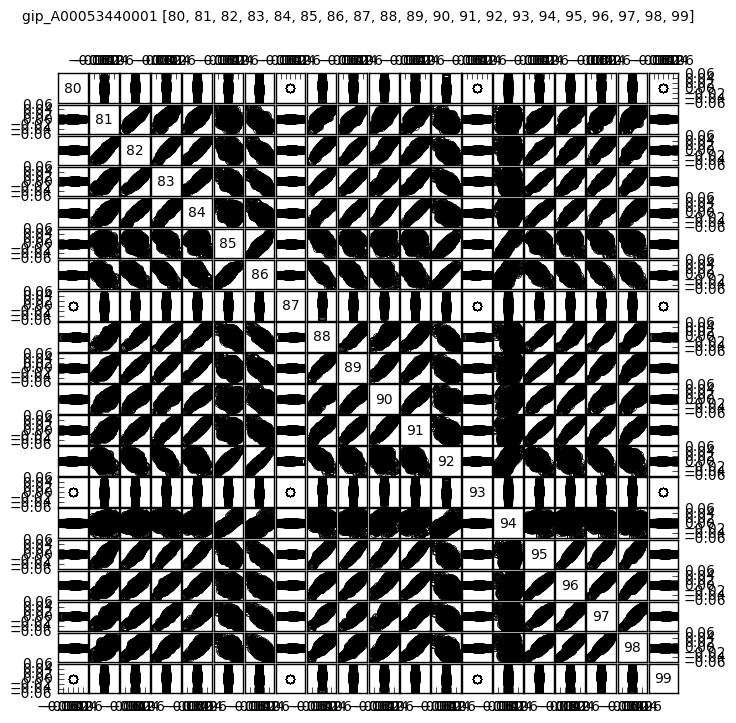

(180719L, 111L)


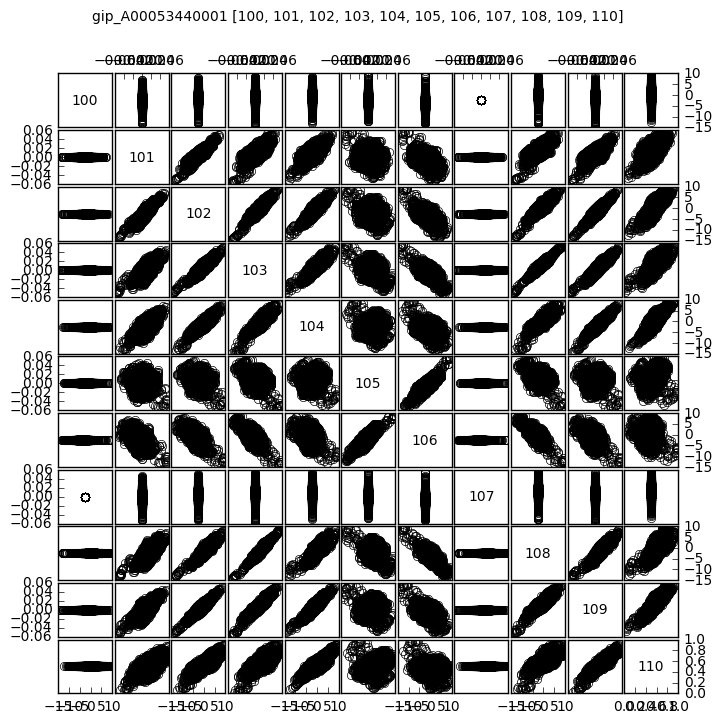

In [69]:
for elec_range in to_run:
    eeg_scatter(patients[4], elec_range, patient_names[4])